# CPSC 330 Python notes

#### About this document

This document contains some Python lecture materials from the 1st offering of CPSC 330. We have decided to stop allocated lecture time to this topic and instead have this as reference material.

In [1]:
import numpy as np
import pandas as pd

## Plotting with matplotlib

- We will use [matplotlib](https://matplotlib.org/) as our plotting library.
- For those familiar with MATLAB, this package is based on MATLAB plotting.
- To use matplotlib, we first import it:

In [2]:
import matplotlib.pyplot as plt

- We can now use functions in `plt` to plot things:

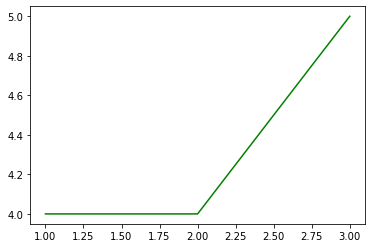

In [7]:
x = [1,2,3]
y = [4,4,5]
plt.plot(x,y,'-g')

- You will often see me put a semicolon at the end of a line. 
- This is only relevant to Jupyter; it suppresses the line of "output"..

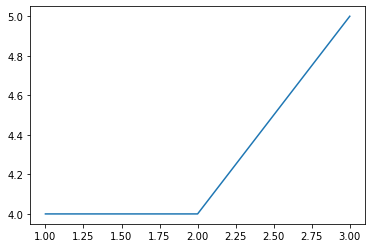

In [8]:
plt.plot(x,y);

- In your homework assignments, at a minimum, you should have axis labels for _every_ figure that you submit.

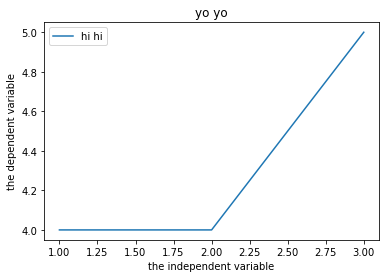

In [13]:
plt.plot(x,y,label='hi hi')
plt.xlabel("the independent variable")
plt.ylabel("the dependent variable");
plt.title('yo yo')
plt.legend()

- If you are plotting multiple curves, make sure you include a legend!

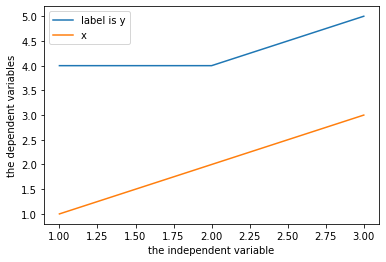

In [14]:
plt.plot(x,y, label="label is y")
plt.plot(x,x, label="x")
plt.xlabel("the independent variable")
plt.ylabel("the dependent variables")
plt.legend();

- You will likely need to visit the [matplotlib.pyplot documentation](https://matplotlib.org/api/pyplot_api.html) when trying to do other things.
- When you save an `.ipynb` file, the output, including plots, is stored in the file.
  - This is a hassle for git.
  - But it's also convenient.
  - This is how you will submit plots.

## Numpy arrays

Basic numpy is covered in the posted videos, you are expected to have a basic knowledge of numpy.

In [15]:
x = np.zeros(4)
x

array([0., 0., 0., 0.])

In [16]:
y = np.ones(4)

In [17]:
x+y

array([1., 1., 1., 1.])

In [18]:
z = np.random.rand(2,3)
z

array([[0.11556744, 0.74265101, 0.32690389],
       [0.8124794 , 0.93303783, 0.31178745]])

In [20]:
z[0][1]

0.7426510050615316

## Numpy array shapes

**One of the most confusing things about numpy:** what I call a "1-D array" can have 3 possible shapes:

In [21]:
x = np.ones(5)
print(x)
print("size:", x.size)
print("ndim:", x.ndim)
print("shape:",x.shape)

[1. 1. 1. 1. 1.]
size: 5
ndim: 1
shape: (5,)


In [24]:
y = np.ones((2,5))
y = np.zeros((4,3))
print(y)
print("size:", y.size)
print("ndim:", y.ndim)
print("shape:",y.shape)

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
size: 12
ndim: 2
shape: (4, 3)


In [26]:
z = np.ones((5,1))
z=np.zeros((4,1))
print(z)
print("size:", z.size)
print("ndim:", z.ndim)
print("shape:",z.shape)
b=z

[[0.]
 [0.]
 [0.]
 [0.]]
size: 4
ndim: 2
shape: (4, 1)


In [27]:
np.array_equal(x,y)

False

In [28]:
np.array_equal(x,z)

False

In [29]:
np.array_equal(y,z)

False

In [30]:
np.array_equal(z,b)

True

## Broadcasting in numpy

- Arrays with different sizes cannot be directly used in arithmetic operations.
- Broadcasting describes how numpy treats arrays with different shapes during arithmetic operations.
- The idea is to **vectorize** operations to avoid loops and speed up the code.

- Example: I sell pies on the weekends.
- I sell 3 types of pies at different prices, and I sold the following number of each pie last weekend.
- I want to know how much money I made per pie type per day.

<img src='img/pies.png' width="500"> 

In [13]:
cost = np.array([20, 15, 25])
print("Pie cost:")
print(cost.reshape(3,1))
sales = np.array([[2, 3, 1],
                  [6, 3, 3],
                  [5, 3, 5]])
print("\nPie sales (#):")
print(sales)

Pie cost:
[[20]
 [15]
 [25]]

Pie sales (#):
[[2 3 1]
 [6 3 3]
 [5 3 5]]


- How can we multiply these two arrays together?

<img src='img/pies_loop.png' width="500"> 

#### Slowest method: nested loop


In [14]:
total = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        total[i,j] = cost[i] * sales[i,j]
total

array([[ 40.,  60.,  20.],
       [ 90.,  45.,  45.],
       [125.,  75., 125.]])

#### Faster method: vectorize the loop over rows

In [15]:
total = np.zeros((3, 3))
for j in range(3):
    total[:,j] = cost * sales[:,j]
total

array([[ 40.,  60.,  20.],
       [ 90.,  45.,  45.],
       [125.,  75., 125.]])

#### No-loop method: make them the same size, and multiply element-wise


<img src='img/pies_broadcast.png' width="700"> 


In [16]:
cost_rep = np.repeat(cost[:,np.newaxis], 3, axis=1)
cost_rep

array([[20, 20, 20],
       [15, 15, 15],
       [25, 25, 25]])

In [17]:
cost_rep * sales

array([[ 40,  60,  20],
       [ 90,  45,  45],
       [125,  75, 125]])

- What is `np.newaxis?`
- It changes the shape:

In [18]:
cost.shape

(3,)

In [19]:
cost[:,np.newaxis].shape

(3, 1)

In [20]:
cost.reshape(3,1).shape # the name thing

(3, 1)

In [21]:
cost[np.newaxis].shape

(1, 3)

#### Fastest method: broadcasting

In [22]:
cost[:,np.newaxis] * sales

array([[ 40,  60,  20],
       [ 90,  45,  45],
       [125,  75, 125]])

- numpy does the equivalent of `np.repeat()` for you - no need to do it explicitly
- It is debatable whether this code is more readable, but it is definitely faster. 

### When can we use broadcasting?

Say we want to broadcast the following two arrays:

In [23]:
arr1 = np.arange(3)
arr2 = np.ones((5))

In [33]:
arr1

array([[0],
       [1],
       [2]])

In [34]:
arr2

array([[1., 1., 1., 1., 1.]])

In [24]:
arr1.shape

(3,)

In [25]:
arr2.shape

(5,)

- The broadcast will fail because the arrays are not compatible...

In [26]:
arr1 + arr2

ValueError: operands could not be broadcast together with shapes (3,) (5,) 

- We can facilitate this broadcast by adding a dimension using `np.newaxis`.
- `np.newaxis` increases the dimension of an array by one dimension.

In [27]:
arr1.shape

(3,)

In [28]:
arr1 = arr1[:, np.newaxis]

In [29]:
arr1.shape

(3, 1)

In [30]:
arr2 = arr2[np.newaxis]

In [31]:
arr2.shape

(1, 5)

In [32]:
arr1 + arr2

array([[1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3.]])

- the opposite, reducing a dimension, can be achieved by `np.squeeze()`

In [35]:
arr1.shape

(3, 1)

In [36]:
np.squeeze(arr1).shape

(3,)

The rules of broadcasting:

- NumPy compares arrays one dimension at a time. It starts with the trailing dimensions, and works its way to the first dimensions.
- dimensions are compatible if:
    - **they are equal**, or
    - **one of them is 1**.
- Use the code below to test out array compatibitlity

In [40]:
a = np.ones((5,1))
b = np.ones((1,3))
print(f"The shape of a is: {a.shape}")
print(f"The shape of b is: {b.shape}")
try:
    print(f"The shape of a + b is: {(a + b).shape}")
except:
    print(f"ERROR: arrays are NOT broadcast compatible!")

The shape of a is: (5, 1)
The shape of b is: (1, 3)
The shape of a + b is: (5, 3)


In [61]:
a=np.random.rand(5,3)
print(a)

b=np.random.rand(5)
print(b)

print(a*b.reshape(5,1))

c=np.zeros((3,1))
print(c.shape)
print(np.squeeze(c).shape)

a=np.ones((3,2))
b=np.ones((4,3))
print(np.matmul(b,a))

[[0.75391167 0.99092018 0.97882544]
 [0.37467936 0.75699462 0.10751553]
 [0.64832154 0.46636154 0.61686515]
 [0.84690946 0.10869713 0.3161171 ]
 [0.72928826 0.76365898 0.64105929]]
[0.74164782 0.4648286  0.81118543 0.82814598 0.30746246]
[[0.55913694 0.73491378 0.72594375]
 [0.17416168 0.35187275 0.04997629]
 [0.52590899 0.37830568 0.50039202]
 [0.70136467 0.0900171  0.26179111]
 [0.22422877 0.23479647 0.19710167]]
(3, 1)
(3,)
[[3. 3.]
 [3. 3.]
 [3. 3.]
 [3. 3.]]


## Introduction to pandas

- The most popular Python library for tabular data structures

In [62]:
import pandas as pd

### Pandas Series
- A Series is like a NumPy array but with labels
- 1-dimensional
- Can be created from a list, ndarray or dictionary using `pd.Series()`
- Labels may be integers or strings

Here are two series of gold medal counts for the 2012 and 2016 Olympics:

<img src='img/series.png' width="400"> 

In [63]:
pd.Series()

C:\Users\moham\AppData\Local\Temp/ipykernel_5172/2031691219.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series()


Series([], dtype: float64)

In [64]:
s1 = pd.Series(data = [46, 38, 29, 19, 17],
               index = ['USA','CHN','GBR','RUS','GER'])
s1

USA    46
CHN    38
GBR    29
RUS    19
GER    17
dtype: int64

In [72]:
s2 = pd.Series([46, 26, 27],
               ['USA', 'CHN', 'GBR'])
s2

USA    46
CHN    26
GBR    27
dtype: int64

In [74]:
shite=pd.Series([1,2,3],['yo','yoyo','yoyoyo'])
shite

yo        1
yoyo      2
yoyoyo    3
dtype: int64

- Like ndarrays we use square brackets `[]` to index a series
- BUT, Series can be indexed by an integer location **OR** a label

In [45]:
s1

USA    46
CHN    38
GBR    29
RUS    19
GER    17
dtype: int64

In [66]:
s1.iloc[0]

46

In [67]:
s1[3]

19

In [47]:
s1.iloc[1]

38

In [68]:
s1["USA"]

46

In [69]:
s1['CHN':'GER']

CHN    38
GBR    29
RUS    19
GER    17
dtype: int64

In [49]:
s1["USA":"RUS"]

USA    46
CHN    38
GBR    29
RUS    19
dtype: int64

Do we expect these two series to be compatible for broadcasting?

In [50]:
s1

USA    46
CHN    38
GBR    29
RUS    19
GER    17
dtype: int64

In [51]:
s2

USA    46
CHN    26
GBR    27
dtype: int64

In [52]:
print(f"The shape of s1 is: {s1.shape}")
print(f"The shape of s2 is: {s2.shape}")

The shape of s1 is: (5,)
The shape of s2 is: (3,)


In [53]:
s1 + s2

CHN    64.0
GBR    56.0
GER     NaN
RUS     NaN
USA    92.0
dtype: float64

- Unlike ndarrays operations between Series (+, -, /, \*) align values based on their **LABELS**
- The result index will be the __*sorted union*__ of the two indexes

## Pandas DataFrames

- The primary Pandas data structure
- Really just a bunch of Series (with the same index labels) stuck together
- Made using `pd.DataFrame()`

<img src='img/dataframe.png' width="600"> 

Creating a DataFrame with a numpy array

In [70]:
d = np.array([[46, 46],
              [38, 26],
              [29, 27]])
c = ['2012', '2016']
i = ['USA', 'CHN', 'GBR']
df = pd.DataFrame(data=d, index=i, columns=c)
df

,2012,2016
USA,46,46
CHN,38,26
GBR,29,27


In [71]:
values=[[1,2],[3,4],[5,6]]
i=['row1','row2','row3']
col=['col1','colcoc2']

df=pd.DataFrame(data=values,index=i,columns=col)
df

,col1,colcoc2
row1,1,2
row2,3,4
row3,5,6


(optional) Creating a DataFrame with a dictionary

In [81]:
d = {'2012': [46, 38, 29],
     '2016': [46, 26, 27]}
i = ['USA', 'CHN', 'GBR']
df = pd.DataFrame(d, i)
df

,2012,2016
USA,46,46
CHN,38,26
GBR,29,27


### Indexing Dataframes
- There are three main ways to index a DataFrame:
    1. `[]` (slice for rows, label for columns)
    2. `.loc[]`
    3. `.iloc[]`

In [82]:
df

,2012,2016
USA,46,46
CHN,38,26
GBR,29,27


##### `[]` notation
- you can index columns by single labels or lists of labels

In [96]:
df[:'CHN']

,2012,2016
USA,46,46
CHN,38,26


In [84]:
type(df['2012'])

pandas.core.series.Series

In [85]:
type(['2012', '2016'])

list

In [87]:
df[['2012', '2016']]

,2012,2016
USA,46,46
CHN,38,26
GBR,29,27


(optional) you can also index rows with `[]`, but you can only index rows with slices

In [62]:
df["CHN":"GBR"]

,2012,2016
CHN,38,26
GBR,29,27


In [64]:
# df["USA"] # doesn't work

In [65]:
df[:"USA"] # does work

,2012,2016
USA,46,46


- this is a little unintuitive, so pandas created two other ways to index a dataframe:
- for indexing with integers: `df.iloc[]`
- for indexing with labels: `df.loc[]`

In [66]:
df

,2012,2016
USA,46,46
CHN,38,26
GBR,29,27


In [67]:
df.iloc[1]

2012    38
2016    26
Name: CHN, dtype: int64

In [68]:
df.iloc[2,1]

27

In [69]:
df.loc['CHN']

2012    38
2016    26
Name: CHN, dtype: int64

In [70]:
df.loc['GBR', '2016']

27

In [71]:
df.loc[['USA', 'GBR'], ['2012']]

,2012
USA,46
GBR,29


In [72]:
df.index

Index(['USA', 'CHN', 'GBR'], dtype='object')

In [73]:
df.columns

Index(['2012', '2016'], dtype='object')

In [76]:
#df.loc[df.index[0], '2016']

In [77]:
#df.loc['USA', df.columns[0]]

#### Indexing cheatsheet
- `[]` accepts slices for row indexing or labels (single or list) for column indexing
- `.iloc[]` accepts integers for row/column indexing, and can be single values or lists
- `.loc[]` accepts labels for row/column indexing, and can be single values or lists
- for integer row/named column: `df.loc[df.index[#], 'labels']`
- for named row/integer column: `df.loc['labels', df.columns[#]]`

## Break (5 min)

### Reading from .csv
- Most of the time you will be loading .csv files for use in pandas using `pd.read_csv()`
- Example dataset: a colleague's cycling commute to/from UBC everyday

In [78]:
path = 'data/cycling_data.csv'

In [79]:
pd.read_csv(path, index_col=0, parse_dates=True).head()

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


### Reading from url
- you may also want to read directly from an url at times
- `pd.read_csv()` accepts urls as input

In [80]:
url = 'https://raw.githubusercontent.com/TomasBeuzen/toy-datasets/master/wine_1.csv'
pd.read_csv(url)

,Bottle,Grape,Origin,Alcohol,pH,Colour,Aroma
0,1,Chardonnay,Australia,14.23,3.51,White,Floral
1,2,Pinot Grigio,Italy,13.20,3.30,White,Fruity
2,3,Pinot Blanc,France,13.16,3.16,White,Citrus
3,4,Shiraz,Chile,14.91,3.39,Red,Berry
4,5,Malbec,Argentina,13.83,3.28,Red,Fruity


### Reading from other formats

- `pd.read_excel()`
- `pd.read_html()`
- `pd.read_json()`
- etc

### Dataframe summaries

In [83]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
Date        33 non-null object
Name        33 non-null object
Type        33 non-null object
Time        33 non-null int64
Distance    31 non-null float64
Comments    33 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ KB


In [85]:
df.describe(include='all')

,Date,Name,Type,Time,Distance,Comments
count,33,33,33,33.000000,31.000000,33
unique,33,2,1,NaN,NaN,25
top,"26 Sep 2019, 13:42:43",Afternoon Ride,Ride,NaN,NaN,Feeling good
freq,1,17,33,NaN,NaN,3
mean,NaN,NaN,NaN,3512.787879,12.667419,NaN
std,NaN,NaN,NaN,8003.309233,0.428618,NaN
min,NaN,NaN,NaN,1712.000000,11.790000,NaN
25%,NaN,NaN,NaN,1863.000000,12.480000,NaN
50%,NaN,NaN,NaN,2118.000000,12.620000,NaN
75%,NaN,NaN,NaN,2285.000000,12.750000,NaN


### Renaming columns with `df.rename()`

In [86]:
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- we can rename specific columns using `df.rename()`

In [89]:
{"Comments": "Notes"}

{'Comments': 'Notes'}

In [88]:
type({"Comments": "Notes"})

dict

In [87]:
df = df.rename(columns={"Comments": "Notes"})
df.head()

,Date,Name,Type,Time,Distance,Notes
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- there are two options for making permanent dataframe changes:
    - 1. set the argument `inplace=True`, e.g., `df.rename(..., inplace=True)`
    - 2. re-assign, e.g., `df = df.rename(...)`

In [ ]:
df.rename(columns={"Comments": "Notes"}, inplace=True) # inplace
df = df.rename(columns={"Comments": "Notes"}) # re-assign

#### NOTE:
- the pandas team discourages the use of `inplace` for a [few reasons](https://www.youtube.com/watch?v=hK6o_TDXXN8&t=700)
- mostly because not all functions have the argument, hides memory copying, leads to hard-to-find bugs
- it is recommend to **re-assign** (method 2 above)

- we can also change all columns at once using a list

In [90]:
df.columns = ['col1', 'col2', 'col3', 'col4', 'col5', 'col6']
df.head()

,col1,col2,col3,col4,col5,col6
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


### Adding/removing columns with `[]` and `drop()`

In [91]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- adding a single column

In [92]:
df['Speed'] = 3.14159265358979323
df.head()

,Date,Name,Type,Time,Distance,Comments,Speed
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain,3.141593
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain,3.141593
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather,3.141593
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise,3.141593
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week,3.141593


- dropping a column

In [93]:
df = df.drop(columns="Speed")
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- we can also add/drop multiple columns at a time

In [95]:
df = df.drop(columns=['Type', 'Time'])
df.head()

,Date,Name,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,12.48,Tired by the end of the week


### Adding/removing rows with `[]` and `drop()`

In [96]:
df = pd.read_csv('data/cycling_data.csv')
df.tail()

,Date,Name,Type,Time,Distance,Comments
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


In [97]:
last_row = df.iloc[-1]
last_row

Date                            11 Oct 2019, 00:16:57
Name                                   Afternoon Ride
Type                                             Ride
Time                                             1843
Distance                                        11.79
Comments    Bike feeling tight, needs an oil and pump
Name: 32, dtype: object

In [ ]:
df.shape

(optional) We can add the row to the end of the dataframe using `df.append()`

In [98]:
df = df.append(last_row)
df.tail()

,Date,Name,Type,Time,Distance,Comments
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


In [99]:
df.shape

(34, 6)

- but now we have the index label `32` occurring twice (that can be bad! Why?)

In [100]:
df.loc[32]

,Date,Name,Type,Time,Distance,Comments
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


In [101]:
df = df.iloc[0:33]
df.tail()

,Date,Name,Type,Time,Distance,Comments
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


- we need can set `ignore_index=True` to avoid duplicate index labels

In [102]:
df = df.append(last_row, ignore_index=True)
df.tail()

,Date,Name,Type,Time,Distance,Comments
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"
33,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


In [103]:
df = df.drop(index=[33])
df.tail()

,Date,Name,Type,Time,Distance,Comments
28,"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
29,"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
30,"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise
32,"11 Oct 2019, 00:16:57",Afternoon Ride,Ride,1843,11.79,"Bike feeling tight, needs an oil and pump"


### Sorting a dataframe with `df.sort_values()`

In [104]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


In [105]:
df.sort_values(by='Time').head()

,Date,Name,Type,Time,Distance,Comments
20,"27 Sep 2019, 01:00:18",Afternoon Ride,Ride,1712,12.47,Tired by the end of the week
26,"3 Oct 2019, 00:45:22",Afternoon Ride,Ride,1724,12.52,Feeling good
22,"1 Oct 2019, 00:15:07",Afternoon Ride,Ride,1732,NaN,Legs feeling strong!
24,"2 Oct 2019, 00:13:09",Afternoon Ride,Ride,1756,NaN,A little tired today but good weather
16,"25 Sep 2019, 00:07:21",Afternoon Ride,Ride,1775,12.10,Feeling really tired


In [106]:
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- use the `ascending` argument to specify sort order as ascending or descending

In [107]:
df.sort_values(by="Time", ascending=False).head()

,Date,Name,Type,Time,Distance,Comments
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good
12,"20 Sep 2019, 01:02:05",Afternoon Ride,Ride,2961,12.81,Feeling good
8,"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
31,"10 Oct 2019, 13:47:14",Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


(optional) we can sort by multiple columns in succession by passing in lists

In [108]:
df.sort_values(by=['Name', 'Time'], ascending=[True, False]).head()

,Date,Name,Type,Time,Distance,Comments
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good
12,"20 Sep 2019, 01:02:05",Afternoon Ride,Ride,2961,12.81,Feeling good
9,"18 Sep 2019, 00:15:52",Afternoon Ride,Ride,2101,12.48,Pumped up tires
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
14,"24 Sep 2019, 00:35:42",Afternoon Ride,Ride,2076,12.47,"Oiled chain, bike feels smooth"


- we can sort a dataframe back to it's orginal state (based on index) using `df.sort_index()`

In [109]:
df.sort_index().head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


### Filtering a dataframe with `[]` and `df.query()`

- we've already seen how to filter a dataframe using `[]`, `.loc` and `.iloc` notation
- but what if we want more control?
- `df.query()` is a powerful tool for filtering data

In [110]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


- `df.query()` accepts a string expression to evaluate, using it's own syntax

In [112]:
df.query('Time > 2500 and Distance < 13')

,Date,Name,Type,Time,Distance,Comments
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good
12,"20 Sep 2019, 01:02:05",Afternoon Ride,Ride,2961,12.81,Feeling good


In [113]:
df[(df['Time'] > 2500) & (df['Distance'] < 13)]

,Date,Name,Type,Time,Distance,Comments
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good
12,"20 Sep 2019, 01:02:05",Afternoon Ride,Ride,2961,12.81,Feeling good


- we can refer to variables in the environment by prefixing them with an `@` 

In [115]:
thresh = 2800
df.query('Time > @thresh')

,Date,Name,Type,Time,Distance,Comments
8,"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
10,"19 Sep 2019, 00:30:01",Afternoon Ride,Ride,48062,12.48,Feeling good
12,"20 Sep 2019, 01:02:05",Afternoon Ride,Ride,2961,12.81,Feeling good


### Applying functions to a dataframe with `df.apply()` and `df.applymap()`

- many common functions are built into Pandas as dataframe methods
- e.g., `df.mean()`, `df.round()`, `df.min()`, `df.max()`, `df.sum()`, etc.

In [116]:
df = pd.read_csv('data/cycling_data.csv')
df.head()

,Date,Name,Type,Time,Distance,Comments
0,"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
1,"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
2,"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
3,"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
4,"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week


In [117]:
df.mean()

Time        3512.787879
Distance      12.667419
dtype: float64

In [118]:
df.min()

Date                         1 Oct 2019, 00:15:07
Name                               Afternoon Ride
Type                                         Ride
Time                                         1712
Distance                                    11.79
Comments    A little tired today but good weather
dtype: object

In [119]:
df.max()

Date        9 Oct 2019, 13:55:40
Name                Morning Ride
Type                        Ride
Time                       48062
Distance                   14.57
Comments                 raining
dtype: object

In [120]:
df.sum()

Date        10 Sep 2019, 00:13:0410 Sep 2019, 13:52:1811 S...
Name        Afternoon RideMorning RideAfternoon RideMornin...
Type        RideRideRideRideRideRideRideRideRideRideRideRi...
Time                                                   115922
Distance                                               392.69
Comments    RainrainWet road but nice weatherStopped for p...
dtype: object

- however there will be times when you want to apply a non-built in function
- `df.apply()` applies a function column-wise or row-wise
- the function must be able to operate over an entire row or column at a time

In [121]:
df[['Time', 'Distance']].head()

,Time,Distance
0,2084,12.62
1,2531,13.03
2,1863,12.52
3,2192,12.84
4,1891,12.48


In [122]:
np.sin(2)

0.9092974268256817

In [124]:
np.sin(0)

0.0

- you may use functions from other packages, such as numpy

In [125]:
df[['Time', 'Distance']].apply(np.sin).head()

,Time,Distance
0,-0.901866,0.053604
1,-0.901697,0.447197
2,-0.035549,-0.046354
3,-0.739059,0.270228
4,-0.236515,-0.086263


- or make your own custom function

In [126]:
df[['Time']].apply(lambda x: x/60).head()

,Time
0,34.733333
1,42.183333
2,31.050000
3,36.533333
4,31.516667


- use `df.applymap()` for functions that accept and return a scalar

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
Date        33 non-null object
Name        33 non-null object
Type        33 non-null object
Time        33 non-null int64
Distance    31 non-null float64
Comments    33 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ KB


In [128]:
float(3)

3.0

In [129]:
float([1, 2]) # this function only accepts a single value, so this will fail

TypeError: float() argument must be a string or a number, not 'list'

In [130]:
df[['Time']].apply(float).head() # fails

TypeError: ("cannot convert the series to <class 'float'>", 'occurred at index Time')

In [131]:
df_float_1 = df[['Time']].applymap(float).head() # works with applymap
df_float_1

,Time
0,2084.0
1,2531.0
2,1863.0
3,2192.0
4,1891.0


- however, if you're applying an in-built function, there's often another (vectorized) way...
- from [Pandas docs](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.applymap.html) "*Note that a vectorized version of func often exists, which will be much faster.*"

In [132]:
df_float_2 = df[['Time']].astype(float).head() # alternatively, use astype
df_float_2

,Time
0,2084.0
1,2531.0
2,1863.0
3,2192.0
4,1891.0


In [133]:
# using vectorized .astype
%timeit df[['Time']].astype(float)

948 µs ± 37.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [134]:
# using element-wise .applymap
%timeit df[['Time']].applymap(float)

2.53 ms ± 85.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
